### EmpyricalDistributions demo

Copyright 2019 Allen Downey

BSD 3-clause license: https://opensource.org/licenses/BSD-3-Clause

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt

### A Pmf is a Series

`empyrical_dist` provides `Pmf`, which is a Pandas Series that represents a probability mass function.

In [2]:
from empyrical_dist import Pmf

You can create a `Pmf` in any of the ways you can create a `Series`, but the most common way is to use `from_seq` to make a `Pmf` from a sequence.

The following is a `Pmf` that represents a six-sided die.

In [3]:
d6 = Pmf.from_seq([1,2,3,4,5,6])

By default, the probabilities are normalized to add up to 1.

In [4]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


But you can also make an unnormalized `Pmf` if you want to keep track of the counts.

In [5]:
d6 = Pmf.from_seq([1,2,3,4,5,6], normalize=False)
d6

,probs
1,1
2,1
3,1
4,1
5,1
6,1


Or normalize later (the return value is the prior sum).

In [6]:
d6.normalize()

6

Now the Pmf is normalized.

In [7]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


### Properties

In a `Pmf` the index contains the quantities (`qs`) and the values contain the probabilities (`ps`).

These attributes are available as properties that return arrays (same semantics as the Pandas `values` property)

In [8]:
d6.qs

array([1, 2, 3, 4, 5, 6])

In [9]:
d6.ps

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

### Plotting PMFs

`Pmf` provides two plotting functions.  `bar` plots the `Pmf` as a histogram.

In [10]:
def decorate_dice(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('PMF')
    plt.title(title)

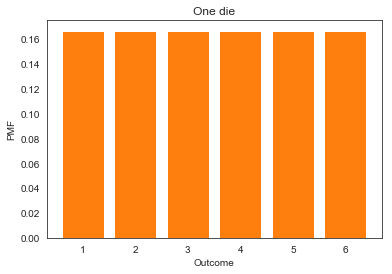

In [11]:
d6.bar()
decorate_dice('One die')

`plot` displays the `Pmf` as a line.

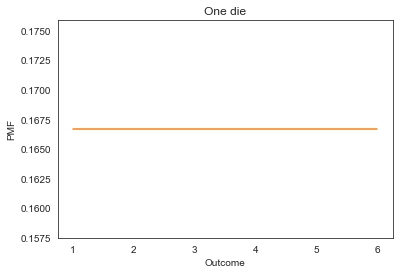

In [12]:
d6.plot()
decorate_dice('One die')

### Selection

The bracket operator looks up an outcome and returns its probability.

Outcomes that are not in the distribution return 0.

In [13]:
d6[1]

0.16666666666666666

In [14]:
d6[6]

0.16666666666666666

In [15]:
d6[7]

0

`Pmf` objects are mutable, but in general the result is not normalized.

In [16]:
d6[7] = 1/6
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667
7,0.166667


In [17]:
d6.sum()

1.1666666666666665

In [18]:
d6.normalize()

1.1666666666666665

In [19]:
d6.sum()

1.0000000000000002

### Statistics

`Pmf` overrides the statistics methods to compute `mean`, `median`, etc.

These functions only work correctly if the `Pmf` is normalized.

In [20]:
d6 = Pmf.from_seq([1,2,3,4,5,6])

In [21]:
d6.mean()

3.5

In [22]:
d6.var()

2.9166666666666665

In [23]:
d6.std()

1.707825127659933

### Sampling

`choice` chooses a random values from the Pmf, following the API of `np.random.choice`

In [24]:
d6.choice(size=10)

array([1, 1, 4, 1, 4, 4, 3, 5, 4, 2])

`sample` chooses a random values from the `Pmf`, following the API of `pd.Series.sample`

In [25]:
d6.sample(n=10, replace=True)

array([4, 5, 4, 4, 4, 3, 6, 3, 6, 1])

### CDFs

`empyrical_dist` also provides `Cdf`, which represents a cumulative distribution function.

In [26]:
from empyrical_dist import Cdf

You can create an empty `Cdf` and then add elements.

Here's a `Cdf` that represents a four-sided die.

In [27]:
d4 = Cdf.from_seq([1,2,3,4])

In [28]:
d4

,probs
1,0.25
2,0.50
3,0.75
4,1.00


### Properties

In a `Cdf` the index contains the quantities (`qs`) and the values contain the probabilities (`ps`).

These attributes are available as properties that return arrays (same semantics as the Pandas `values` property)

In [29]:
d4.qs

array([1, 2, 3, 4])

In [30]:
d4.ps

array([0.25, 0.5 , 0.75, 1.  ])

### Displaying CDFs

`Cdf` provides two plotting functions.

`plot` displays the `Cdf` as a line.

In [31]:
def decorate_dice(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('CDF')
    plt.title(title)

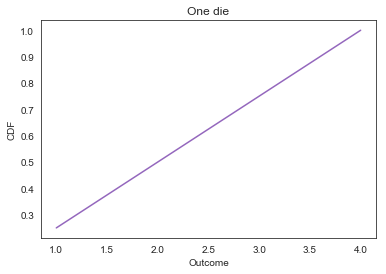

In [32]:
d4.plot()
decorate_dice('One die')

`step` plots the Cdf as a step function (which is more technically correct).

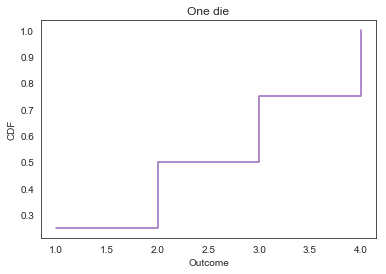

In [33]:
d4.step()
decorate_dice('One die')

### Selection

The bracket operator works as usual.

In [34]:
d4[1]

0.25

In [35]:
d4[4]

1.0

`Cdf` objects are mutable, but in general the result is not a valid Cdf.

In [36]:
d4[5] = 1.25
d4

,probs
1,0.25
2,0.50
3,0.75
4,1.00
5,1.25


In [37]:
d4.normalize()
d4

,probs
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


### Evaluating CDFs

`Cdf` provides `forward` and `inverse`, which evaluate the CDF and its inverse as functions.

Evaluating a `Cdf` forward maps from a quantity to its cumulative probability.

In [38]:
d6 = Cdf.from_seq([1,2,3,4,5,6])

In [39]:
d6.forward(3)

array(0.5)

`forward` interpolates, so it works for quantities that are not in the distribution.

In [40]:
d6.forward(3.5)

array(0.5)

In [41]:
d6.forward(0)

array(0.)

In [42]:
d6.forward(7)

array(1.)

You can also call the `Cdf` like a function (which it is).

In [43]:
d6(1.5)

array(0.16666667)

`forward` can take an array of quantities, too.

In [44]:
def decorate_cdf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Quantity')
    plt.ylabel('CDF')
    plt.title(title)

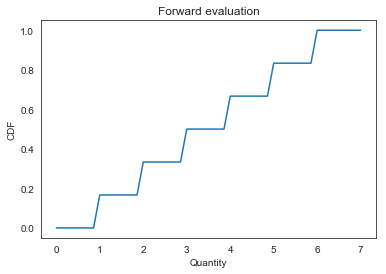

In [45]:
qs = np.linspace(0, 7)
ps = d6(qs)
plt.plot(qs, ps)
decorate_cdf('Forward evaluation')

`Cdf` also provides `inverse`, which computes the inverse `Cdf`:

In [46]:
d6.inverse(0.5)

array(3.)

`quantile` is a synonym for `inverse`

In [47]:
d6.quantile(0.5)

array(3.)

`inverse` and `quantile` work with arrays 

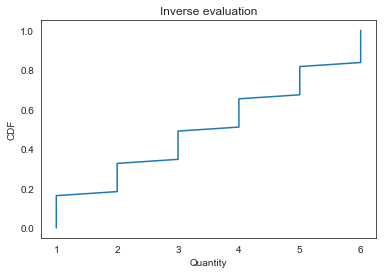

In [48]:
ps = np.linspace(0, 1)
qs = d6.quantile(ps)
plt.plot(qs, ps)
decorate_cdf('Inverse evaluation')

These functions provide a simple way to make a Q-Q plot.

Here are two samples from the same distribution.

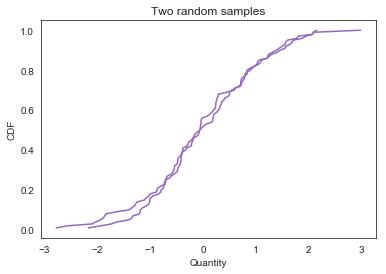

In [49]:
cdf1 = Cdf.from_seq(np.random.normal(size=100))
cdf2 = Cdf.from_seq(np.random.normal(size=100))

cdf1.plot()
cdf2.plot()
decorate_cdf('Two random samples')

Here's how we compute the Q-Q plot.

In [50]:
def qq_plot(cdf1, cdf2):
    """Compute results for a Q-Q plot.
    
    Evaluates the inverse Cdfs for a 
    range of cumulative probabilities.
    
    :param cdf1: Cdf
    :param cdf2: Cdf
    
    :return: tuple of arrays
    """
    ps = np.linspace(0, 1)
    q1 = cdf1.quantile(ps)
    q2 = cdf2.quantile(ps)
    return q1, q2

The result is near the identity line, which suggests that the samples are from the same distribution.

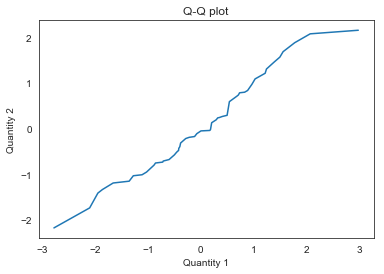

In [51]:
q1, q2 = qq_plot(cdf1, cdf2)
plt.plot(q1, q2)
plt.xlabel('Quantity 1')
plt.ylabel('Quantity 2')
plt.title('Q-Q plot');

Here's how we compute a P-P plot

In [52]:
def pp_plot(cdf1, cdf2):
    """Compute results for a P-P plot.
    
    Evaluates the Cdfs for all quantities in either Cdf.
    
    :param cdf1: Cdf
    :param cdf2: Cdf
    
    :return: tuple of arrays
    """
    qs = cdf1.index.union(cdf2)
    p1 = cdf1(qs)
    p2 = cdf2(qs)
    return p1, p2

And here's what it looks like.

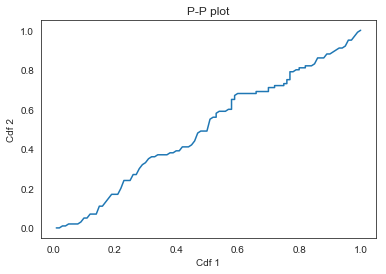

In [53]:
p1, p2 = pp_plot(cdf1, cdf2)
plt.plot(p1, p2)
plt.xlabel('Cdf 1')
plt.ylabel('Cdf 2')
plt.title('P-P plot');

### Statistics

`Cdf` overrides the statistics methods to compute `mean`, `median`, etc.

In [54]:
d6.mean()

3.5

In [55]:
d6.var()

2.916666666666667

In [56]:
d6.std()

1.7078251276599332

### Sampling

`choice` chooses a random values from the Cdf, following the API of `np.random.choice`

In [57]:
d6.choice(size=10)

array([2, 6, 5, 4, 2, 4, 4, 3, 5, 5])

`sample` chooses a random values from the `Cdf`, following the API of `pd.Series.sample`

In [58]:
d6.sample(n=10, replace=True)

array([3, 2, 6, 2, 5, 3, 5, 2, 5, 5])

### Arithmetic

`Pmf` and `Cdf` provide `add_dist`, which computes the distribution of the sum.

Here's the distribution of the sum of two dice.

In [59]:
d6 = Pmf.from_seq([1,2,3,4,5,6])

twice = d6.add_dist(d6)
twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


6.999999999999998

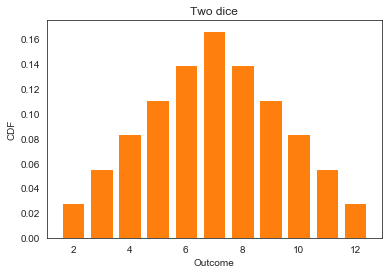

In [60]:
twice.bar()
decorate_dice('Two dice')
twice.mean()

To add a constant to a distribution, you could construct a deterministic `Pmf`

In [61]:
const = Pmf.from_seq([1])
d6.add_dist(const)

,probs
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667
7,0.166667


But `add_dist` also handles constants as a special case:

In [62]:
d6.add_dist(1)

,probs
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667
7,0.166667


Other arithmetic operations are also implemented

In [63]:
d4 = Pmf.from_seq([1,2,3,4])

In [64]:
d6.sub_dist(d4)

,probs
-3,0.041667
-2,0.083333
-1,0.125000
0,0.166667
1,0.166667
2,0.166667
3,0.125000
4,0.083333
5,0.041667


In [65]:
d4.mul_dist(d4)

,probs
1,0.0625
2,0.1250
3,0.1250
4,0.1875
6,0.1250
8,0.1250
9,0.0625
12,0.1250
16,0.0625


In [66]:
d4.div_dist(d4)

,probs
0.250000,0.0625
0.333333,0.0625
0.500000,0.1250
0.666667,0.0625
0.750000,0.0625
1.000000,0.2500
1.333333,0.0625
1.500000,0.0625
2.000000,0.1250
3.000000,0.0625


### Comparison operators

`Pmf` implements comparison operators that return probabilities.

You can compare a `Pmf` to a scalar:

In [67]:
d6.lt_dist(3)

0.3333333333333333

In [68]:
d4.ge_dist(2)

0.75

Or compare `Pmf` objects:

In [69]:
d4.gt_dist(d6)

0.25

In [70]:
d6.le_dist(d4)

0.41666666666666663

In [71]:
d4.eq_dist(d6)

0.16666666666666666

Interestingly, this way of comparing distributions is [nontransitive]().

In [72]:
A = Pmf.from_seq([2, 2, 4, 4, 9, 9])
B = Pmf.from_seq([1, 1, 6, 6, 8, 8])
C = Pmf.from_seq([3, 3, 5, 5, 7, 7])

In [73]:
A.gt_dist(B)

0.5555555555555556

In [74]:
B.gt_dist(C)

0.5555555555555556

In [75]:
C.gt_dist(A)

0.5555555555555556

### Joint distributions

`Pmf.make_joint` takes two `Pmf` objects and makes their joint distribution, assuming independence.

In [76]:
psource(Pmf.make_joint)

Object `(Pmf.make_joint)` not found.


In [77]:
d4 = Pmf.from_seq(range(1,5))
d4

,probs
1,0.25
2,0.25
3,0.25
4,0.25


In [78]:
d6 = Pmf.from_seq(range(1,7))
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [79]:
joint = Pmf.make_joint(d4, d6)
joint

1  1    0.041667
   2    0.041667
   3    0.041667
   4    0.041667
   5    0.041667
   6    0.041667
2  1    0.041667
   2    0.041667
   3    0.041667
   4    0.041667
   5    0.041667
   6    0.041667
3  1    0.041667
   2    0.041667
   3    0.041667
   4    0.041667
   5    0.041667
   6    0.041667
4  1    0.041667
   2    0.041667
   3    0.041667
   4    0.041667
   5    0.041667
   6    0.041667
dtype: float64

The result is a `Pmf` object that uses a MultiIndex to represent the values.

In [80]:
joint.index

MultiIndex(levels=[[1, 2, 3, 4], [1, 2, 3, 4, 5, 6]],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]])

If you ask for the `qs`, you get an array of pairs:

In [81]:
joint.qs

array([(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2),
       (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4),
       (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6)],
      dtype=object)

You can select elements using tuples:

In [82]:
joint[1,1]

0.041666666666666664

You can get unnnormalized conditional distributions by selecting on different axes:

In [83]:
Pmf(joint[1])

,probs
1,0.041667
2,0.041667
3,0.041667
4,0.041667
5,0.041667
6,0.041667


In [84]:
Pmf(joint.loc[:, 1])

,probs
1,0.041667
2,0.041667
3,0.041667
4,0.041667


But `Pmf` also provides `conditional(i,j,val)` which returns the distribution along axis `i` conditioned on the value of axis `j`: 

In [85]:
joint.conditional(0, 1, 1)

,probs
1,0.25
2,0.25
3,0.25
4,0.25


In [86]:
joint.conditional(1, 0, 1)

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


It also provides `marginal(i)`, which returns the marginal distribution along axis `i`

In [87]:
joint.marginal(0)

,probs
1,0.25
2,0.25
3,0.25
4,0.25


In [88]:
joint.marginal(1)

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


Here are some ways of iterating through a joint distribution.

In [89]:
for q in joint.qs:
    print(q)

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)


In [90]:
for p in joint.ps:
    print(p)

0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664
0.041666666666666664


In [91]:
for q, p in joint.items():
    print(q, p)

(1, 1) 0.041666666666666664
(1, 2) 0.041666666666666664
(1, 3) 0.041666666666666664
(1, 4) 0.041666666666666664
(1, 5) 0.041666666666666664
(1, 6) 0.041666666666666664
(2, 1) 0.041666666666666664
(2, 2) 0.041666666666666664
(2, 3) 0.041666666666666664
(2, 4) 0.041666666666666664
(2, 5) 0.041666666666666664
(2, 6) 0.041666666666666664
(3, 1) 0.041666666666666664
(3, 2) 0.041666666666666664
(3, 3) 0.041666666666666664
(3, 4) 0.041666666666666664
(3, 5) 0.041666666666666664
(3, 6) 0.041666666666666664
(4, 1) 0.041666666666666664
(4, 2) 0.041666666666666664
(4, 3) 0.041666666666666664
(4, 4) 0.041666666666666664
(4, 5) 0.041666666666666664
(4, 6) 0.041666666666666664


In [92]:
for (q1, q2), p in joint.items():
    print(q1, q2, p)

1 1 0.041666666666666664
1 2 0.041666666666666664
1 3 0.041666666666666664
1 4 0.041666666666666664
1 5 0.041666666666666664
1 6 0.041666666666666664
2 1 0.041666666666666664
2 2 0.041666666666666664
2 3 0.041666666666666664
2 4 0.041666666666666664
2 5 0.041666666666666664
2 6 0.041666666666666664
3 1 0.041666666666666664
3 2 0.041666666666666664
3 3 0.041666666666666664
3 4 0.041666666666666664
3 5 0.041666666666666664
3 6 0.041666666666666664
4 1 0.041666666666666664
4 2 0.041666666666666664
4 3 0.041666666666666664
4 4 0.041666666666666664
4 5 0.041666666666666664
4 6 0.041666666666666664
